<a href="https://colab.research.google.com/github/bozorgpanah/The-Explainable-Machine-Learning-Model-withPrivacy/blob/main/Paper1/MDAV%2BSHAP_CervicalCancer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
MDAV
SHAP
ON
Risk Factor Cervical Cancer dataset
"""

In [ ]:
#Uploading a dataset from local drive to colab
from google.colab import files
uploaded = files.upload()

Saving risk_factors_cervical_cancer.csv to risk_factors_cervical_cancer.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import io

##Reading dataset
df = pd.read_csv(io.BytesIO(uploaded['risk_factors_cervical_cancer.csv']), na_values='?') #Dataset's name == housing.csv
# Dataset is now stored in a Pandas Dataframe
df.info()


# now check for missing values in total bedrooms
df.isnull().sum()
# ------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 37 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          858 non-null    int64  
 1   Age                                 858 non-null    int64  
 2   Number of sexual partners           858 non-null    float64
 3   First sexual intercourse            858 non-null    float64
 4   Num of pregnancies                  858 non-null    float64
 5   Smokes                              858 non-null    float64
 6   Smokes (years)                      858 non-null    float64
 7   Smokes (packs/year)                 858 non-null    float64
 8   Hormonal Contraceptives             858 non-null    float64
 9   Hormonal Contraceptives (years)     858 non-null    float64
 10  IUD                                 858 non-null    float64
 11  IUD (years)                         858 non-n

Unnamed: 0                            0
Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0


In [ ]:
print(df.mean())

new_df = df.replace("?", np.mean) 

##Feature Vector and Target Variable
X = new_df[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 
        'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 
        'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 
        'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx',
        'Hinselmann', 'Schiller', 'Citology','Biopsy']] #Feature Vector
y = new_df[['Hinselmann', 'Schiller', 'Citology','Biopsy']] #Target Variable

#remove missed values
for i in X:
  avg = new_df[i].astype("float").mean(axis=0) 
  new_df[i].replace(np.nan, avg, inplace=True)

##Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


print(new_df)
new_df.to_csv("new_df.csv")
files.download("new_df.csv")

new_df.isnull().sum()

Unnamed: 0                            428.500000
Age                                    26.820513
Number of sexual partners               2.527644
First sexual intercourse               16.995300
Num of pregnancies                      2.275561
Smokes                                  0.145562
Smokes (years)                          1.219721
Smokes (packs/year)                     0.453144
Hormonal Contraceptives                 0.641333
Hormonal Contraceptives (years)         2.256419
IUD                                     0.112011
IUD (years)                             0.514804
STDs                                    0.104914
STDs (number)                           0.176627
STDs:condylomatosis                     0.058433
STDs:cervical condylomatosis            0.000000
STDs:vaginal condylomatosis             0.005312
STDs:vulvo-perineal condylomatosis      0.057105
STDs:syphilis                           0.023904
STDs:pelvic inflammatory disease        0.001328
STDs:genital herpes 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unnamed: 0                            0
Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0


In [ ]:
#MDAV a microagregation method 
def dist(x,y):
    return np.linalg.norm(x-y)
    
#Stack arrays in sequence vertically (row wise)
def poprow(arr,i):
    pop = arr[i]
    new_array = np.vstack((arr[:i],arr[i+1:]))
    return new_array,pop

def cluster(X, p, k, dist_to_xr):
    c = [p]
    
    if dist_to_xr == None:
        distances = [dist(v[:-1],p[:-1]) for v in X]
    else:
        distances = dist_to_xr
        
    X = X[np.argpartition(distances, k-1)]
    c.extend(X[:k-1])
    X = X[k-1:]
    
    xc = np.array([p[:-1] for p in c], copy=False, ndmin=2)
    yc = np.array([p[-1] for p in c], copy=False)
    cl = (xc, yc)
    
    return X, cl

def mdav(X, y, k):
    D = np.column_stack((X,y)) #D is a matrix of variables
    clusters = []
    centroids = []
    while len(D) >= 3*k:
        # Centroid
        xm = np.mean(D, axis=0) #xm is an array includes mean in each variables (each columns)
        # Furthest from centroid
        xri = np.argmax([dist(v[:-1],xm[:-1]) for v in D])#Find furthest from the centroid in each vector and it's called xri
        D, xr = poprow(D, xri)
        # Furthest from furthest from centroid
        dist_to_xr = [dist(v[:-1],xr[:-1]) for v in D]
        xsi = np.argmax(dist_to_xr)
        dist_to_xr = dist_to_xr[:xsi]+dist_to_xr[xsi+1:]
        D, xs = poprow(D, xsi) 

        #cluster of xr
        D, c = cluster(D, xr, k, dist_to_xr)
        clusters.append(c)
        #cluster of xs
        D, c = cluster(D, xs, k, None)
        clusters.append(c)
        
    if len(D) >= 2*k and len(D) < 3*k:
        # Centroid
        xm = np.mean(D, axis=0)
        # Furthest from centroid
        xri = np.argmax([dist(v[:-1],xm[:-1]) for v in D])
        D, xr = poprow(D, xri)
        #cluster of xr
        D, c = cluster(D, xr, k, None)
        clusters.append(c)
        
        # rest of points
        xc = np.array([p[:-1] for p in D[:]], copy=False, ndmin=2)
        yc = np.array([p[-1] for p in D[:]], copy=False)
        cl = (xc, yc)
        clusters.append(cl)     
    else:
        # rest of points
        xc = np.array([p[:-1] for p in D[:]], copy=False, ndmin=2)
        yc = np.array([p[-1] for p in D[:]], copy=False)
        cl = (xc, yc)
        clusters.append(cl)
    
    centroids = np.array([np.mean(c[0],axis=0) for c in clusters], copy=False)
    
    return clusters, centroids

In [ ]:
for i in range(16):
  i = i+1
  print(int(859/i))
 

859
429
286
214
171
143
122
107
95
85
78
71
66
61
57
53


In [ ]:
#We use smaller K amount
import csv
import time
import statistics 
exec_times = []

 

i = 0  #859, 58,38,29,23,19,16,14,12,11,10,9,8,8,7,7
k = 45

clusterings = []
centroids = []
maskedData = []
print(f'k = {k}')

#for k in K:
start = time.time()
  #print(k, K)
clustering, centroid = mdav(X, y, k) #clustering, centroid = mdav(X_train, y_train, k)
clusterings.append(clustering)
centroids.append(centroid)


with open('clusterings_csv.csv','w',newline='') as fp:
  c = csv.writer(fp, delimiter = ',')    
  for line in clusterings:
      c.writerows(line)
################################################################################
j=0
with open('centroids_risk_factors_cervical_cancer.csv','w',newline='') as f:
    fieldnames = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 
        'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 
        'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 
        'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 
        'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
    z = csv.DictWriter(f, fieldnames=fieldnames)
    z.writeheader()
    z = csv.writer(f, delimiter = ',')
    for line in centroids:
      for j in range(0,k):
          z.writerows(line)

i = 0
while i<k:
  maskedData.append(centroid)
  i += 1  

end = time.time()
exec_times.append(end-start)
    #arr_ctr_num.append(len(centroids))
print(f'Time for calculating = {exec_times}')

#Saveing centroids in a file
f_centroids = open("Centroids.txt","wt")
f_centroids.write("\n"+str(centroids)+"\n")
f_clusters = open("Clusers.txt","wt")
f_clusters.write("\n"+str(clusterings)+"\n")
f_maskedData = open("MaskedData.txt","wt")
f_maskedData.write("\n"+str(maskedData)+"\n")
f_maskedData.close()
f_centroids.close()
f_clusters.close()
files.download("centroids_risk_factors_cervical_cancer.csv")

k = 45
Time for calculating = [0.17521357536315918]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#SHAP
!pip install shap #Install SHAP library
#Uploading a dataset from local drive to colab
#from google.colab import files
#uploaded = files.upload()

     |████████████████████████████████| 356 kB 8.4 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491638 sha256=0014bf5e070f551d034a33bfea340f3bcfe0b1011411d754771d673a26149a35
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import io
from google.colab import files

#Uploading a dataset from local drive to colab
uploaded = files.upload()

##Reading dataset
df = pd.read_csv(io.BytesIO(uploaded['centroids_risk_factors_cervical_cancer (k=13).csv'])) #Dataset's name == risk_factors_cervical_cancer.csv     centroids_risk_factors_cervical_cancer (k=45).csv
# Dataset is now stored in a Pandas Dataframe
df.info()

# now check for missing values in total bedrooms
df.isnull().sum()
# ------------------------------------------------------------------

Saving centroids_risk_factors_cervical_cancer (k=13).csv to centroids_risk_factors_cervical_cancer (k=13).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
import math
##Feature Vector and Target Variable
X = df[['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 
        'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 
        'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 
        'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']] #Feature Vector
y = df[['Hinselmann', 'Schiller', 'Citology', 'Biopsy']] #Target Variable

##Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

"""
print(X_train,y_train)
print("####################################################################################################")
print(X_test,y_test)
"""
##Building the model with --> Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

##Generating Predictions
y_pred = model.predict(X_test)
#print("Prediction: ", y_pred)

##Evaluating Performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
print("mean_squared_error: ", mse)

rmse = math.sqrt(mse)
print('\n\nAccuracy for Random Forest:',100*max(0,rmse)) 


mean_squared_error:  0.03538053118602962


Accuracy for Random Forest: 18.809713231740037


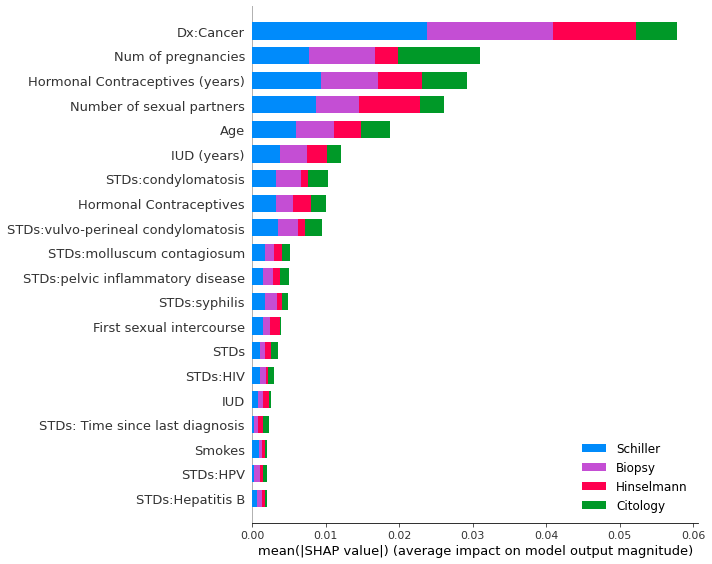

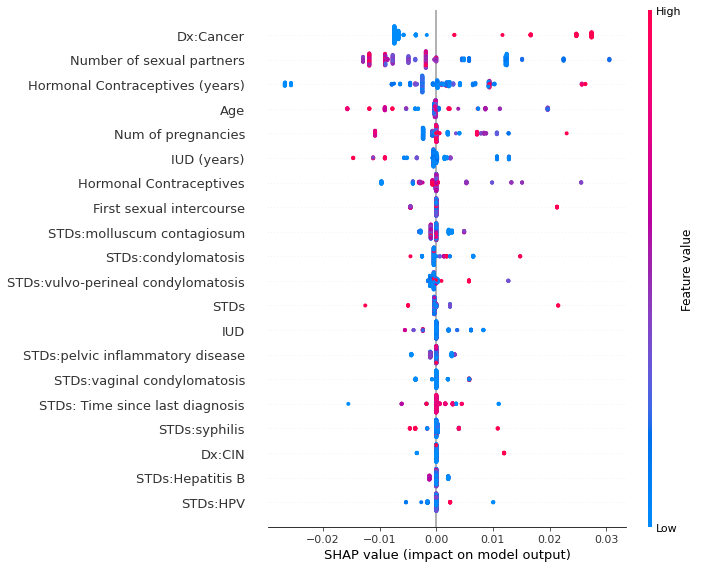

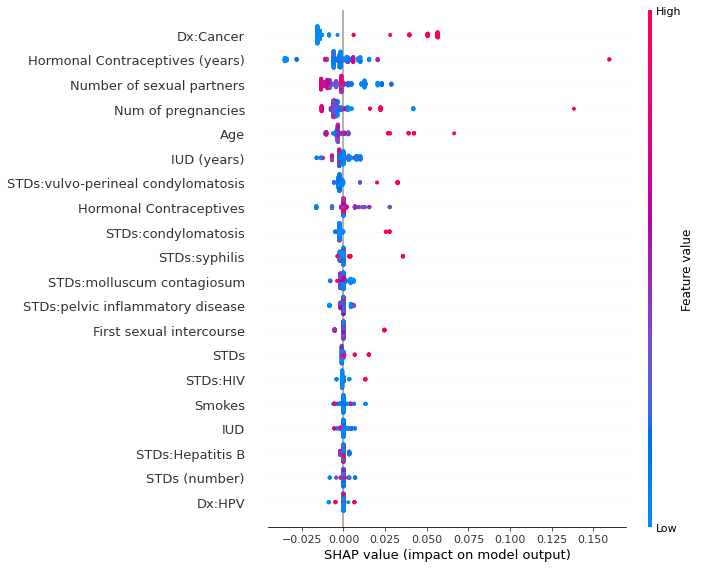

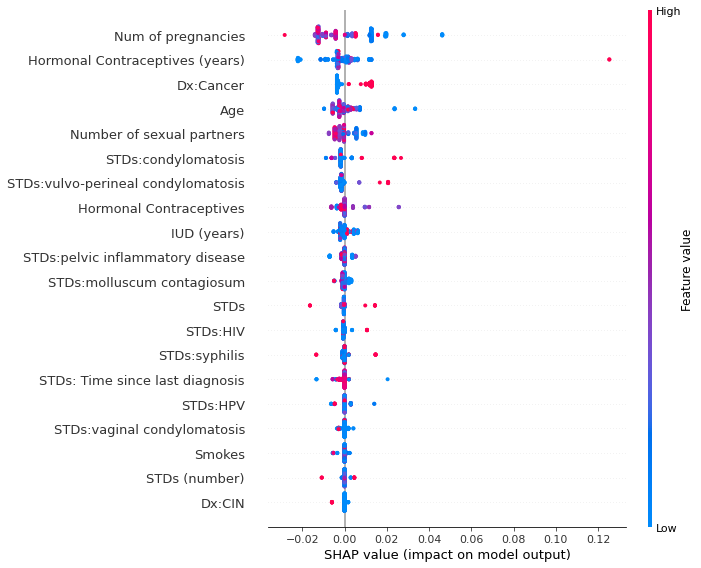

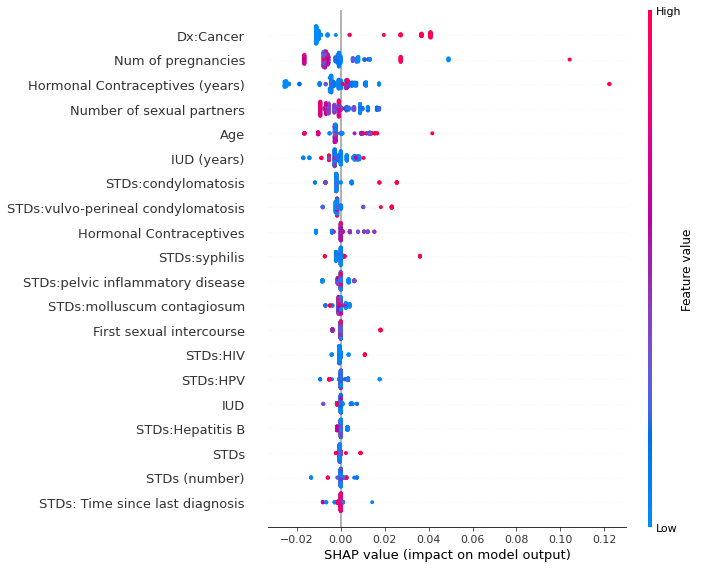

In [ ]:
import shap 

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test,approximate=True)

class_names=['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
shap.summary_plot(shap_values, X_test, class_names=class_names)
#shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values[0], X_test)
shap.summary_plot(shap_values[1], X_test)
shap.summary_plot(shap_values[2], X_test)
shap.summary_plot(shap_values[3], X_test)

In [ ]:
import shap 

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test,approximate=True)

class_names=['Hinselmann', 'Schiller', 'Citology', 'Biopsy']
shap.summary_plot(shap_values, X_test, class_names=class_names)
#shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values[0], X_test)
shap.summary_plot(shap_values[1], X_test)
shap.summary_plot(shap_values[2], X_test)
shap.summary_plot(shap_values[3], X_test)
"""
shap.dependence_plot("Dx:Cancer", shap_values[0], features=X_test, feature_names=X.columns, )
shap.dependence_plot("Dx:Cancer", shap_values[1], features=X_test, feature_names=X.columns, )
shap.dependence_plot("Dx:Cancer", shap_values[2], features=X_test, feature_names=X.columns, )
shap.dependence_plot("Dx:Cancer", shap_values[3], features=X_test, feature_names=X.columns, )

shap.dependence_plot("Age", shap_values[0], features=X_test, feature_names=X.columns, )
shap.dependence_plot("Age", shap_values[1], features=X_test, feature_names=X.columns, )
shap.dependence_plot("Age", shap_values[2], features=X_test, feature_names=X.columns, )
shap.dependence_plot("Age", shap_values[3], features=X_test, feature_names=X.columns, )


##SHAP Feature Importance
shap_values = shap.TreeExplainer(model).shap_values(X_train)

shap.approximate_interactions(2,shap_values[0], X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")


shap.decision_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])
##SHAP Summary Plot
shap.summary_plot(shap_values[0], X_train)

##SHAP Dependence Plot

shap.dependence_plot('Age', shap_values[0], X_train)
shap.dependence_plot('Age', shap_values[1], X_train)
shap.dependence_plot('Age', shap_values[2], X_train)
shap.dependence_plot('Age', shap_values[3], X_train)


shap.dependence_plot('Number of sexual partners', shap_values, X_train)
shap.dependence_plot('Num of pregnancies', shap_values, X_train)
shap.dependence_plot('Smokes (packs/year)', shap_values, X_train)
shap.dependence_plot('Hormonal Contraceptives', shap_values, X_train)
shap.dependence_plot('Hormonal Contraceptives (years)', shap_values, X_train)
shap.dependence_plot('IUD', shap_values, X_train)
shap.dependence_plot('IUD (years)', shap_values, X_train)
shap.dependence_plot('STDs:cervical condylomatosis', shap_values, X_train)
shap.dependence_plot('STDs:vaginal condylomatosis', shap_values, X_train)
shap.dependence_plot('STDs: Number of diagnosis', shap_values, X_train)
shap.dependence_plot('STDs: Time since first diagnosis', shap_values, X_train)
shap.dependence_plot('STDs: Time since last diagnosis', shap_values, X_train)
shap.dependence_plot('Dx:Cancer', shap_values, X_train)
#shap.dependence_plot('', shap_values, X_train)
'''

SyntaxError: ignored

In [ ]:
##SHAP Explanation
#Force Plots
# import shap library
import shap 
from IPython.display import display

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
display(shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:]))


TypeError: ignored

In [ ]:
shap.initjs()
# visualize the training set predictions
#shap.force_plot(explainer.expected_value, shap_values, X_train)


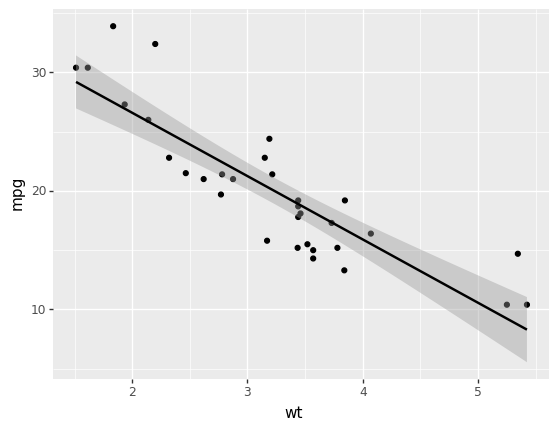

<ggplot: (8752363929845)>

In [ ]:
#ploting Test


from plotnine import *
from plotnine.data import mtcars

(ggplot(mtcars, aes('wt', 'mpg'))#, color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm'))